# NBA Data: Modeling

Knowing the amount of number of 2-point shots, 3-point shots, and free-throws, should theoretically predict the winner of a basketball game with 100% accuracy because the team that scores the most points wins and those are all 3 ways to score points. I could throw all of my dependent variables in the model and have something incredibly accurate but that doesn't help anyone because it would just be stating the obvious.

The value of this model is to provide guidance in team building and training. No team is ever \#1 in every stat category. That's not feasable. Instead I'm going to limit the model to only 3 inputs. This way, a caoch and go to their team and say "This year, we will focus on 3 things". Keep it simple for the team so they don't get scatterbrained trying to do too much. 

Now it's just a matter of which 3 dependent variables to focus on. Which combination of 3 best predicts the win/loss outcome. Secondarily, which of the 3 is most important as well. 

## Imports

In [14]:
import pickle

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest, f_classif


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif


#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay

#from sklearn.decomposition import PCA
#from sklearn.preprocessing import scale
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from library.sb_utils import save_file

## Load Data

In [2]:
nba_df = pickle.load(open("data_clean/nba_df3.pkl", "rb"))
X_train_scaled = pickle.load(open("data_clean/X_train_scaled.pkl", "rb"))
X_test_scaled = pickle.load(open("data_clean/X_test_scaled.pkl", "rb"))
y_train = pickle.load(open("data_clean/y_train.pkl", "rb"))
y_test = pickle.load(open("data_clean/y_test.pkl", "rb"))

## Circling Back

After running a few tests I realized that including a metric for field goals which is just the summation of 2-point and 3-point field goals is reudnant. When using *SelectKBest()* it would often times use fg_pct (field goal percentage) and fg2_pct (2-point field goal percentage). So I'm going to remove the fga and fg_pct inputs

In [3]:
nba_df = nba_df.drop(columns = ["fga", "fg_pct"])
X_train_scaled = X_train_scaled.drop(columns = ["fga", "fg_pct"])
X_test_scaled = X_test_scaled.drop(columns = ["fga", "fg_pct"])
nba_df

fg2a   fg2_pct  fg3a   fg3_pct   fta    ft_pct   reb   ast   stl  blk  \
0      68.0  0.470588   8.0  0.250000  30.0  0.500000  38.0  20.0   9.0  4.0   
1      63.0  0.492063   7.0  0.142857  34.0  0.735294  41.0  23.0   8.0  4.0   
2      66.0  0.545455  15.0  0.266667  34.0  0.617647  48.0  25.0  18.0  7.0   
3      62.0  0.483871  13.0  0.153846  40.0  0.700000  43.0  20.0   9.0  4.0   
4      71.0  0.478873   6.0  0.666667  29.0  0.689655  52.0  25.0  10.0  7.0   
...     ...       ...   ...       ...   ...       ...   ...   ...   ...  ...   
51332  75.0  0.346667  22.0  0.363636  24.0  0.833333  55.0  20.0   5.0  7.0   
51333  59.0  0.440678  41.0  0.365854  21.0  0.857143  40.0  30.0   9.0  4.0   
51334  65.0  0.615385  28.0  0.500000  26.0  0.769231  52.0  34.0   7.0  9.0   
51335  60.0  0.500000  34.0  0.352941  20.0  0.800000  48.0  30.0   7.0  7.0   
51336  63.0  0.396825  35.0  0.428571  26.0  0.846154  47.0  22.0  14.0  6.0   

         to    pf   win  
0      18.0  34.0  loss  
1      18.0  26.0   win  
2      25.0  35.0   win  
3      24.0  26.0  loss  
4      25.0  33.0   win  
...     ...   ...   ...  
51332   8.0  22.0  loss  
51333  14.0  19.0  loss  
51334  15.0  20.0   win  
51335  21.0  23.0  loss  
51336  13.0  23.0   win  

[51328 rows x 13 columns]

## Model 1: Logistic Regression

Logistic Regression jawn
https://github.com/EmekaNwosu/Data-Science-Career-Track/blob/main/14.2%20Logistic%20Regression%20Advanced%20Case%20Study.ipynb

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Using all Inputs

I just want to see how the model works when using all the inputs

In [4]:
lib_classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
#clf_classifier = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [5]:
lib_classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [23]:
print(f'Accuracy on training data: {accuracy_score(lib_classifier.predict(X_train_scaled), y_train):.2f}')
print(f'Accuracy on test data: {accuracy_score(lib_classifier.predict(X_test_scaled), y_test):.2f}')

Accuracy on training data: 0.83
Accuracy on test data: 0.83


Classification reports

In [24]:
print("Classification Report for Training Data")
print(classification_report(y_train, lib_classifier.predict(X_train_scaled)))

Classification Report for Training Data
              precision    recall  f1-score   support

        loss       0.83      0.84      0.83     17971
         win       0.84      0.83      0.83     17958

    accuracy                           0.83     35929
   macro avg       0.83      0.83      0.83     35929
weighted avg       0.83      0.83      0.83     35929



In [6]:
print("Classification Report for Test Data")
print(classification_report(y_test, lib_classifier.predict(X_test_scaled)))

Classification Report for Test Data
              precision    recall  f1-score   support

        loss       0.83      0.83      0.83      7693
         win       0.83      0.83      0.83      7706

    accuracy                           0.83     15399
   macro avg       0.83      0.83      0.83     15399
weighted avg       0.83      0.83      0.83     15399



https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6

In [18]:
clf = LogisticRegression(solver = 'liblinear', max_iter = 500)
cv = KFold(n_splits=10, random_state=1, shuffle=True)


scores = cross_val_score(clf, X_train_scaled, y_train, cv=cv)
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Cross-Validation Accuracy Scores [0.82939048 0.83328695 0.83467854 0.83968828 0.83857501 0.83940996
 0.82883384 0.83022544 0.8341219  0.82989978]
Accuracy: 0.834 (0.004)


### select kbest

In [51]:
SelectKBest(f_classif, k=3).fit(X_train_scaled, y_train).get_support(indices = True)

array([1, 3, 7], dtype=int64)

In [58]:
# https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
x_new = SelectKBest(f_classif, k=3).fit(X_train_scaled, y_train)
cols = x_new.get_support(indices = True)
X_train_scaled_kbest = X_train_scaled.iloc[:,cols]
X_test_scaled_kbest = X_test_scaled.iloc[:,cols]


X_train_scaled_kbest

fg2_pct   fg3_pct       ast
0      2.754835  0.846519  2.849027
1      1.162500 -0.922691 -0.207129
2     -0.109979 -0.173566 -0.207129
3     -0.280774 -0.173566 -0.207129
4     -0.294360 -0.718384 -1.544197
...         ...       ...       ...
35924  0.346363  0.825267 -0.207129
35925  0.738172  0.575559  1.320949
35926 -1.526152 -1.243745 -2.117226
35927  0.198790  0.978934  0.365900
35928  0.758339 -0.173566  1.129940

[35929 rows x 3 columns]

In [55]:
lib_classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

lib_classifier.fit(X_train_scaled_kbest, y_train)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [59]:
print(f'Accuracy on training data: {accuracy_score(lib_classifier.predict(X_train_scaled_kbest), y_train):.2f}')
print(f'Accuracy on test data: {accuracy_score(lib_classifier.predict(X_test_scaled_kbest), y_test):.2f}')

Accuracy on training data: 0.69
Accuracy on test data: 0.69


In [60]:
print("Classification Report for Training Data")
print(classification_report(y_train, lib_classifier.predict(X_train_scaled_kbest)))

Classification Report for Training Data
              precision    recall  f1-score   support

        loss       0.69      0.69      0.69     17971
         win       0.69      0.68      0.69     17958

    accuracy                           0.69     35929
   macro avg       0.69      0.69      0.69     35929
weighted avg       0.69      0.69      0.69     35929



In [61]:
print("Classification Report for Training Data")
print(classification_report(y_test, lib_classifier.predict(X_test_scaled_kbest)))

Classification Report for Training Data
              precision    recall  f1-score   support

        loss       0.69      0.69      0.69      7693
         win       0.69      0.69      0.69      7706

    accuracy                           0.69     15399
   macro avg       0.69      0.69      0.69     15399
weighted avg       0.69      0.69      0.69     15399



## Model 2: Random Forest

Random Forest Jawn

https://github.com/EmekaNwosu/Data-Science-Career-Track/blob/main/14.4%20RandomForest_casestudy_covid19.ipynb

In [28]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
# ! pip install pydotplus --user
import pydotplus

In [29]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 610)

# Call fit() on entr_model
entr_model.fit(X_train_scaled, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test_scaled)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=610)

In [30]:
import os
os.environ["PATH"] += os.pathsep + 'D:\Program Files\Graphviz2.38/bin/'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.13688 to fit



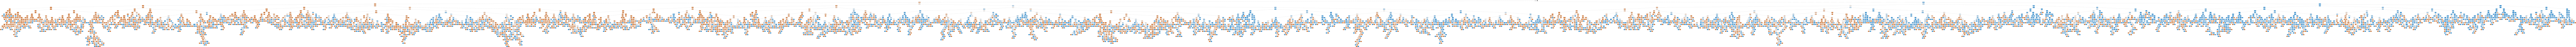

In [32]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train_scaled.columns, class_names = ["0", "1"]) 


# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())